# Optimal weights
## The point the varies the least
- Build a grid of xi(r, ns) because camb takes a while to run.
- Build a 2d interp function from the grid.
- Get peak and dip.
- Store r_dip and r_peak as a function of ns.
- Find the weighting the has the least variation.

# Vary ns over larger interval
- Tweak rootfinding to encompass larger range of ns values

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import matplotlib.pylab as pylab
import matplotlib as mpl
# functions to get LP from cosmology
import linear_point as lp
from scipy.interpolate import CubicSpline
from scipy.integrate import quad
from scipy.optimize import minimize
# doing cosmological calculations from parameters
import camb

%matplotlib inline

In [2]:
# for plots
sns.set_style("ticks",
             rc = {'axes.grid' : False,
                  'grid.linestyle' : 'dashed',
                  "xtick.direction": "in","ytick.direction": "in"})

sns.set_context('paper', font_scale=1.8)
pylab.rcParams['xtick.major.pad']='6'
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

sns.set_palette("Set1")

In [3]:
# creating instance of CAMBparams object
pars = camb.CAMBparams()
# krange
kmin = 0.001
kmax = 10.

In [4]:
pars.set_accuracy(AccuracyBoost=1.5);

In [59]:
# fiducial TT,TE,EE + lowP
ombh2_fid=0.02225
omch2_fid=0.1198
theta_fid = 1.04077/100
h_fid = 0.6790
tau_fid = 0.079
ns_fid=0.9645
As_fid=2.207e-9
# sigmas
ombh2_sig = 0.00016
omch2_sig = 0.0015
ns_sig = 0.0049

In [61]:
def get_lp(results, kmin=kmin, kmax=kmax):
    dip, peak = lp.lp_from_cosmo_mpc(results, kmin, kmax)
    return (dip+peak)/2

def get_rd(results):
    return results.get_derived_params()['rdrag']

In [64]:

# fiducial
results = get_results(pars)
lp_fid = get_lp(results)
rd_fid = get_rd(results)
print("lp_fid:{:.2f} , rd_fid:{:.2f}".format(lp_fid, rd_fid))

lp_fid:138.24 , rd_fid:147.28


In [6]:
def get_results(pars, z=0, ombh2 = ombh2_fid, omch2 = omch2_fid,
                h = h_fid, tau = tau_fid, As = As_fid, ns = ns_fid):
    pars.set_cosmology(ombh2=ombh2,
                       omch2 =omch2,
                       H0=100*h,
                       tau=tau)
    pars.InitPower.set_params(ns=ns,
                              As=As)
    pars.set_matter_power(
        redshifts=[z], kmax=kmax, nonlinear=False, k_per_logint=0)
    return camb.get_results(pars)


def xi(results, rmin=115., rmax=160., rsamples=30, khmin = kmin, khmax=kmax):
    """Returns xi(r) for r varying between rmin, rmax in rsamples steps"""

    # get interpolate xi_list
    r_list = np.linspace(rmin, rmax, rsamples)
    pk = lp.get_pk_func(results, khmin, khmax, k_hunit=False)
    xi_list = [lp.xi(r, pk) for r in r_list]
    return xi_list

def xi_grid(ns_list, pars=pars, rmin=115., rmax=160., 
            rsamples=30, khmin = kmin, khmax=kmax):
    grid = np.zeros((len(ns_list), rsamples))
    for i, ns in enumerate(ns_list):
        # get results from ns
        results = get_results(pars, ns = ns)
        grid[i] = xi(results, rmin, rmax, rsamples, khmin, khmax)
    return grid, np.linspace(rmin, rmax, rsamples), ns_list
        



# def int_xi2(r, xi=xi, ns_a = 0, ns_b = 2):
#     """ Integral of xi(r,ns)^2 over ns"""
#     f = lambda ns: xi(r, ns)**2
#     return quad(f, ns_a, ns_b)

## Grid

In [116]:
ns_min = 0.9
ns_max = 1.1
ns_list = np.linspace(ns_min,ns_max, 20)

grid, rs, nss = xi_grid(ns_list)

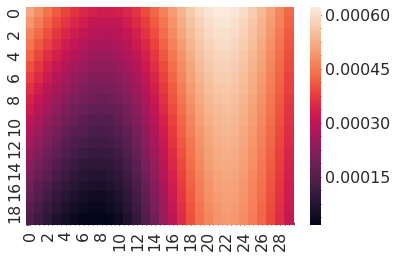

In [32]:
sns.heatmap(grid)

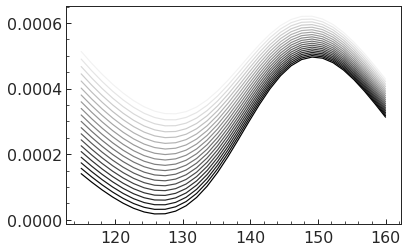

In [41]:
for i in range(len(grid)):
    plt.plot(rs,grid[i],'k', alpha=(i+1)/len(grid))

## Interpolate Grid 

In [54]:
from scipy.interpolate import interp2d, RectBivariateSpline

In [57]:
len(rs)

30

In [60]:
len(nss)

20

In [62]:
grid.shape

(20, 30)

In [63]:
#xi_r_ns = interp2d(rs, nss, grid, kind='cubic')
xi_r_ns = RectBivariateSpline(nss, rs, grid)

In [64]:
n = 100
rlist = np.linspace(rs[0], rs[-1], n)
nlist = np.linspace(nss[0], nss[-1], n)

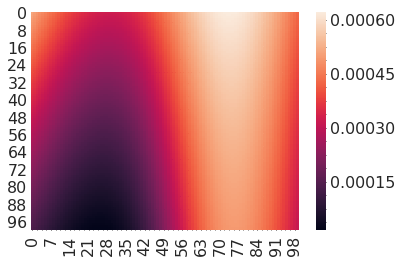

In [66]:
sns.heatmap(xi_r_ns(nlist,rlist))

In [68]:
xi_r_ns(ns,rlist)

array([[0.00051333, 0.00050246, 0.00049182, 0.0004814 , 0.00047121,
        0.00046127, 0.00045157, 0.00044212, 0.00043293, 0.000424  ,
        0.00041536, 0.000407  , 0.00039894, 0.0003912 , 0.00038377,
        0.00037669, 0.00036996, 0.0003636 , 0.00035762, 0.00035204,
        0.00034689, 0.00034218, 0.00033792, 0.00033415, 0.00033087,
        0.00032811, 0.00032588, 0.00032421, 0.00032312, 0.00032261,
        0.00032271, 0.00032342, 0.00032476, 0.00032674, 0.00032936,
        0.00033263, 0.00033654, 0.00034109, 0.00034627, 0.00035207,
        0.00035848, 0.00036546, 0.00037301, 0.00038109, 0.00038965,
        0.00039868, 0.00040812, 0.00041793, 0.00042807, 0.00043847,
        0.00044909, 0.00045986, 0.00047073, 0.00048164, 0.00049252,
        0.00050332, 0.00051396, 0.0005244 , 0.00053457, 0.0005444 ,
        0.00055385, 0.00056285, 0.00057137, 0.00057934, 0.00058672,
        0.00059348, 0.00059958, 0.00060498, 0.00060967, 0.0006136 ,
        0.00061678, 0.00061918, 0.0006208 , 0.00

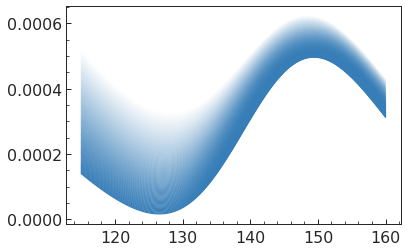

In [73]:
for i, ns in enumerate(nlist):
    plt.plot(rlist,xi_r_ns(ns,rlist)[0],'C1', alpha=(i+1)/len(nlist))

## Finding dip and peak from interpolated function

In [96]:
n = 100
rlist = np.linspace(rs[0], rs[-1], n)
nlist = np.linspace(nss[0], nss[-1], n)

In [99]:
pd_list = np.zeros((n,2))

for i, ns in enumerate(nlist):
    df = lambda r: xi_r_ns(ns, r, dy=1)
    dip = brentq(df, 110, 140)
    peak = brentq(f, 140, 160)
    pd_list[i] = [dip,peak]

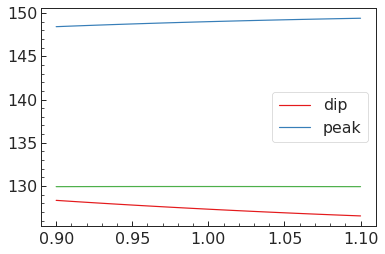

In [156]:
dip, peak = pd_list[:,0], pd_list[:,1]

plt.plot(nlist, dip, label='dip')
plt.plot(nlist, peak, label='peak')



plt.legend()

## Weighted Sum

In [108]:
# get peak and dip as funtions
peak = CubicSpline(nlist, pd_list[:,1])
dip = CubicSpline(nlist, pd_list[:,0])

In [141]:
# define a function as the weighted sum of dip and peak
def wsum(ns,a,b):
    return a*dip(ns) + b*peak(ns)

# define a function to quantify how much the function varies
# keep in mind that the function is monotonic at least in the interval I've looked
def dwsum(weights, ns_min = ns_min, ns_max=ns_max):
    a, b = weights
    return np.abs(wsum(ns_max,a,b) - wsum(ns_min, a, b))

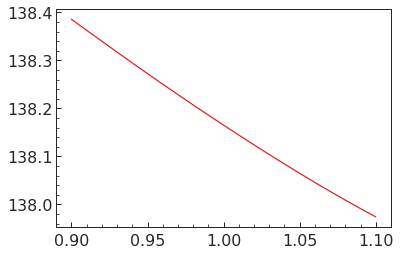

In [142]:
# make sure lp gets out correctly from interpolated functions
plt.plot(nlist, wsum(nlist, 0.5,0.5))

In [143]:
dwsum([0.5,0.5])

0.41180560748037465

### Minimize weighted sum function

In [146]:
a,b = minimize(int2, [0.5,0.5])['x']

In [151]:
print(a,b)

0.323148279610986 0.5959038398278723


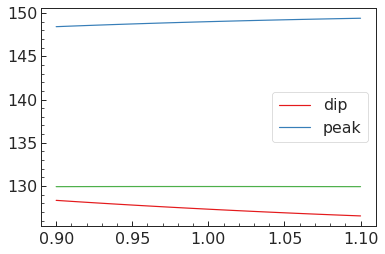

In [159]:
# make sure lp gets out correctly from interpolated functions
dip, peak = pd_list[:,0], pd_list[:,1]

plt.plot(nlist, dip, label='dip')
plt.plot(nlist, peak, label='peak')

plt.plot(nlist, a*dip + b*peak)
#plt.plot(nlist, wsum(nlist, a, b))

plt.legend()

# Varying ns over large range

### try to see when the function breaks
By hand:
* at ns=0.5025 dip, peak = (139.02376863682068, 139.60515133623232)
* works until ns=2

In [8]:
from linear_point import lp_from_cosmo_mpc

In [50]:
results = get_results(pars, ns = 0.5025)
lp_from_cosmo_mpc(results, rsamples=40, root_dr=0.1)

(139.02376863682068, 139.60515133623232)

In [53]:
results = get_results(pars, ns = 2)
lp_from_cosmo_mpc(results, rsamples=40, root_dr=0.1)

(127.84764363642542, 149.50355092216802)

## Get list of lp over a few points

In [98]:
ns_min = 0.51
ns_max = 2.

In [99]:
n = 30
ns_list = np.linspace(ns_min, ns_max,n)
pd_list = np.zeros((n,2))
rd_list = np.zeros(n)

for i in range(n):
    results = get_results(pars, ns = ns_list[i])
    dip, peak = lp_from_cosmo_mpc(results, rsamples=40, root_dr=0.2)
    pd_list[i] = [dip, peak]
    rd_list[i] = get_rd(results)
    print(i, end='-')

01234567891011121314151617181920212223242526272829

## Get functions by interpolating

In [100]:
dip, peak = pd_list[:,0], pd_list[:,1]
dip_f = CubicSpline(ns_list, dip)
peak_f = CubicSpline(ns_list, peak)

## Repeating steps from above to get optimal weighting

In [115]:
# define a function as the weighted sum of dip and peak
def wsum(ns,a,b):
    return a*dip_f(ns) + b*peak_f(ns)

# define a function to quantify how much the function varies
def dwsum(weights, ns_min = ns_min, ns_max=ns_max):
    a, b = weights
    nsl = np.linspace(ns_min, ns_max, 100)
    ws = wsum(nsl, a, b)
    return np.var(ws)



In [184]:
a,b = minimize(dwsum, [0.5,0.5], bounds=[(0.5,0.6),(0.4,0.5)])['x']
print(a,b)

0.5 0.5


In [194]:
a = minimize(lambda x: dwsum([x,1-x]), 0.5)['x'][0]
b = 1 -a

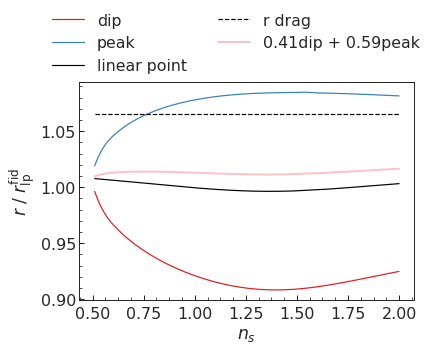

In [199]:
nplot = np.linspace(ns_list[0], ns_list[-1], 200)
dip_plot, peak_plot = dip_f(nplot), peak_f(nplot)
linpoint = (dip_plot+peak_plot)/2

plt.plot(nplot, dip_plot/lp_fid, label='dip')
plt.plot(nplot, peak_plot/lp_fid, label='peak')
plt.plot(nplot, linpoint/lp_fid, 'k', label='linear point')
plt.plot(ns_list, rd_list/lp_fid, 'k--', label='r drag')


plt.ylabel(r'$r$ / $r^{\rm fid}_{\rm lp}$')

# a = 0.454
# b = 1-a
# plt.axhline(linpoint[0]/lp_fid, color='gray')

plt.plot(nplot, wsum(nplot, a, b)/lp_fid, 
         label=f'{a:.2f}dip + {b:.2f}peak',
        lw=2, color='pink')

plt.legend(frameon=False, ncol=2,
          bbox_to_anchor=(-0.1, 1.35), loc='upper left', borderaxespad=0.)

plt.xlabel('$n_s$')

plt.show()